# Hate Speech and Offensive Language Dataset

# 1. Preprosseing raw tweets

Connect to Kaggle

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
import kagglehub
mrmorj_hate_speech_and_offensive_language_dataset_path = kagglehub.dataset_download('mrmorj/hate-speech-and-offensive-language-dataset')

print('Data source import complete.')


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/hate-speech-and-offensive-language-dataset/labeled_data.csv


# Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

 Import dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mrmorj/hate-speech-and-offensive-language-dataset")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/hate-speech-and-offensive-language-dataset


In [ ]:
# Read the dataset from Kaggle
df = pd.read_csv('/kaggle/input/hate-speech-and-offensive-language-dataset/labeled_data.csv')
#df.head(10)

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
df.count()

,0
Unnamed: 0,24783
count,24783
hate_speech,24783
offensive_language,24783
neither,24783
class,24783
tweet,24783


## Label Count




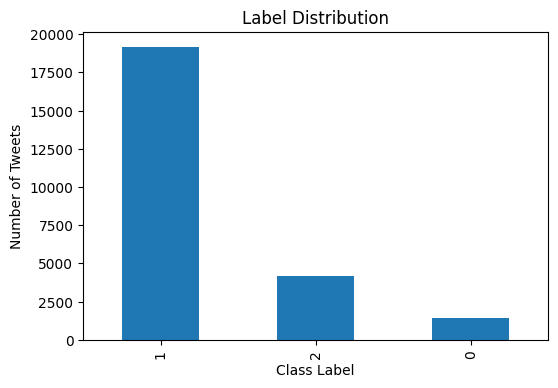

In [ ]:
# Count the number of tweets in each class
label_counts = df['class'].value_counts()

# Plot the class distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
label_counts.plot(kind="bar")
plt.title("Label Distribution")
plt.xlabel("Class Label")
plt.ylabel("Number of Tweets")
plt.show()

## Number of words in each tweet

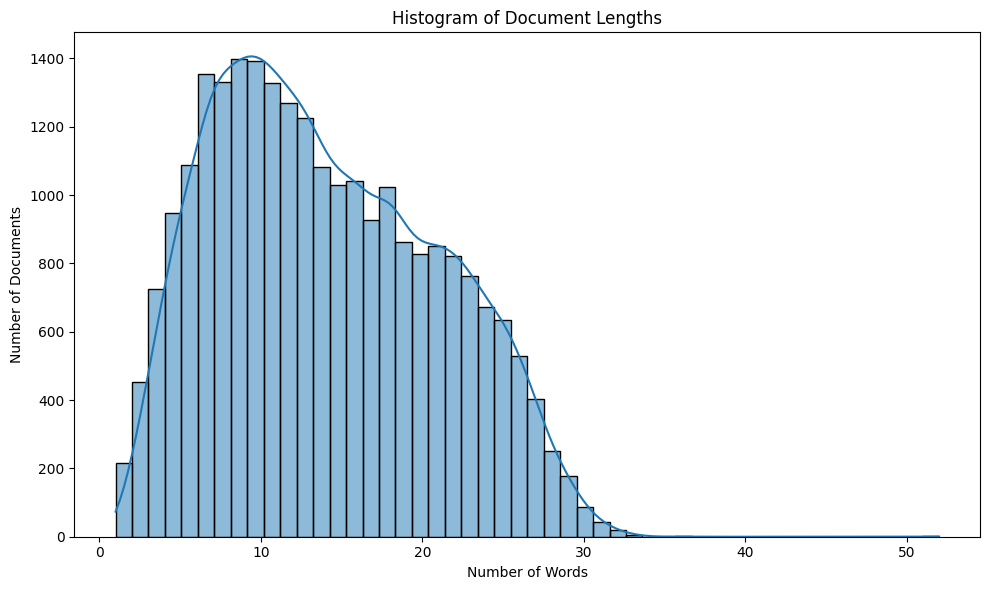

In [ ]:
# Calculate the number of words in each tweet
df['length'] = df['tweet'].apply(lambda x: len(str(x).split()))

# Plot histogram of document lengths
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['length'], bins=50, kde=True)
plt.title("Histogram of Document Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Number of Documents")
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Boxplot of Document Lengths')

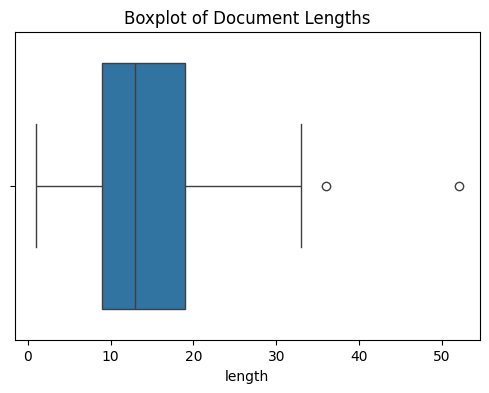

In [ ]:
# Box plot of document legths
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['length'])
plt.title("Boxplot of Document Lengths")

# Preprocessing

## Count the number of documents in each class label

In [ ]:
df['class'].value_counts()

,count
class,
1,19190
2,4163
0,1430


Balance the dataset by sampling 1430 documents from each Class

/tmp/ipython-input-2260920576.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_data = data_by_label.apply(lambda x: x.sample(n=1430, random_state=14)).reset_index(drop=True)



Balanced class distribution:
class
0    1430
1    1430
2    1430
Name: count, dtype: int64


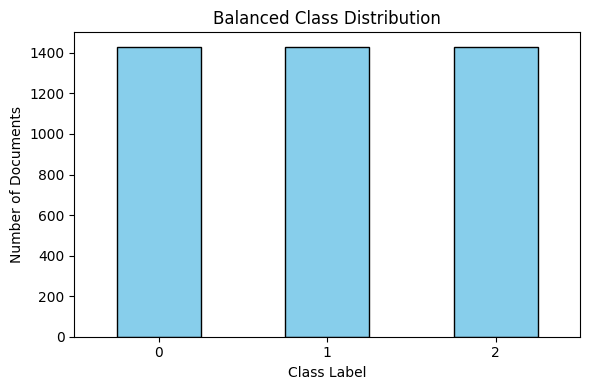

In [ ]:
# Balance the dataset: sample 1430 documents from each class
data_by_label = df.groupby('class')
balanced_data = data_by_label.apply(lambda x: x.sample(n=1430, random_state=14)).reset_index(drop=True)

# Check class distribution after balancing
print("\nBalanced class distribution:")
print(balanced_data['class'].value_counts())

# Plot balanced class distribution
balanced_label_counts = balanced_data['class'].value_counts()

plt.figure(figsize=(6, 4))
balanced_label_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Balanced Class Distribution')
plt.xlabel('Class Label')
plt.ylabel('Number of Documents')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# **Unbalanced Case**

Randomly sample 10,000 tweets labeled as Offensive Language (class 1), and include all 1,430 tweets labeled as Hate Speech (class 0) and all 4,163 tweets labeled as Neither (class2).

In [ ]:
# Sample 10,000 from class 1
class_1_subset = df[df['class'] == 1].sample(n=10000, random_state=42)

# Get all rows for class 2 and 0
class_2_all = df[df['class'] == 2]
class_0_all = df[df['class'] == 0]

# Combine them
unbalanced_data = pd.concat([class_1_subset, class_2_all, class_0_all])

# Optional: shuffle the final dataframe
unbalanced_data = unbalanced_data.sample(frac=1, random_state=42).reset_index(drop=True)
unbalanced_data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,length
0,2352,3,0,1,2,2,@1Corinthians126 #BooksOfGodWidom Proverbs 1:2...,18
1,1381,3,0,1,2,2,&#8220;@KarynHalpin: Where do all the foreskin...,24
2,24555,3,1,2,0,1,"if you can fuck my bitch, cause nigga i'm the ...",14
3,4895,3,0,3,0,1,@StephyRae7 No I'm pimping out you and those g...,16
4,14065,3,0,0,3,2,Oriental rugs cause I'm flyer than a dove.,8


## Preprocessing


In [ ]:
## Preprocess the data
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Use the balanced dataset
df = unbalanced_data.copy()

# Define stopwords set
stopword_set = set(stopwords.words('english'))

# Define full preprocessing function
def clean_tweet(text):
    text = re.sub(r'@\w+', '', text)                     # Remove @mentions
    text = re.sub(r'RT : ', '', text)                    # Remove "RT :"
    text = re.sub(r'http\S+', '', text)                  # Remove URLs
    text = re.sub(r'(\n)+', ' ', text)                   # Remove newlines
    text = re.sub(r'&#\d+;', ' ', text)                  # Remove emojis/codepoints
    text = re.sub(r' +', ' ', text)                      # Remove extra spaces
    text = re.sub(r'#(\w+)', '', text)                   # Remove hashtags
    text = re.sub(r'&amp', 'and', text)                  # Replace &amp with 'and'
    text = re.sub(r'&(\w+);', '', text)                  # Remove other HTML entities
    text = re.sub(r'[^\w\s\d]+', '', text)               # Remove punctuation
    text = text.lower()                                  # Convert to lowercase
    text = " ".join([word for word in text.split() if word not in stopword_set])  # Remove stopwords
    return text

# Apply cleaning to the tweet column
df['tweet'] = df['tweet'].apply(clean_tweet)

# Show first 10 cleaned tweets
df['tweet'].head(10)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tweet
0,proverbs 126 also laugh calamity mock fear cometh
1,foreskins go circumcise guy foreskin fairy tak...
2,fuck bitch cause nigga im shit ill salute ya
3,im pimping guys park playing bitch volleyball
4,oriental rugs cause im flyer dove
5,youre funny trash
6,im surprised im still school tbh quite retard ...
7,new boss said buttons shirt cant white colored...
8,thee bears trash tho
9,yes protest sexism go right home beg guy beat ...


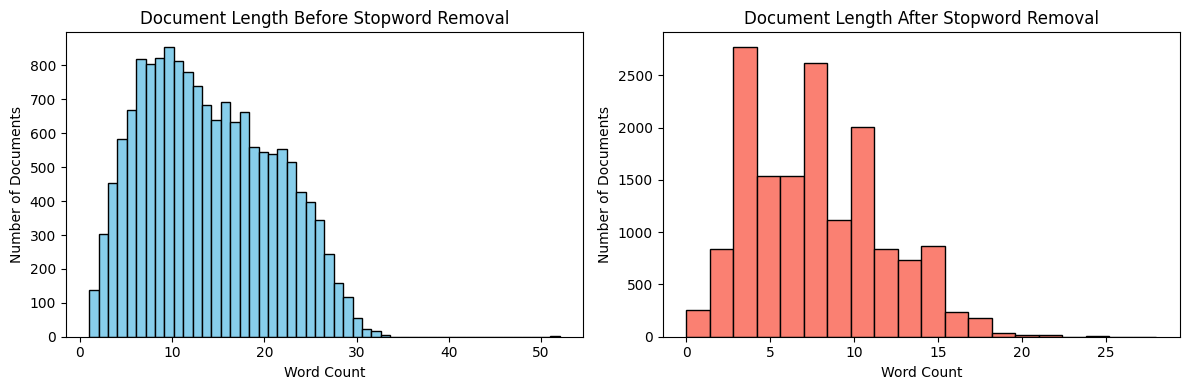

In [ ]:
# Calculate length of each tweet after stopword removal
df['stopword_removed_length'] = df['tweet'].apply(lambda x: len(str(x).split()))

# Plot distribution of document length: before and after stopword removal
import matplotlib.pyplot as plt

fig, axis = plt.subplots(1, 2, figsize=(12, 4))

# 📊 Length distribution before stopword removal
axis[0].hist(df['length'], bins=50, color='skyblue', edgecolor='black')
axis[0].set_title('Document Length Before Stopword Removal')
axis[0].set_xlabel('Word Count')
axis[0].set_ylabel('Number of Documents')

# 📉 Length distribution after stopword removal
axis[1].hist(df['stopword_removed_length'], bins=20, color='salmon', edgecolor='black')
axis[1].set_title('Document Length After Stopword Removal')
axis[1].set_xlabel('Word Count')
axis[1].set_ylabel('Number of Documents')

plt.tight_layout()
plt.show()


## Lemmatization

In [ ]:
# Lemmatization
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize

# Download required NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng') # Added explicit download for English tagger


lemmatizer = WordNetLemmatizer()

# Function to convert NLTK POS tags to WordNet format
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # default to noun

# Lemmatization function with POS tagging
def lemmatize_with_pos(text: str) -> str:
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    lemmatized = [
        lemmatizer.lemmatize(word, get_wordnet_pos(pos_tag))
        for word, pos_tag in tagged_tokens
    ]
    return ' '.join(lemmatized)

# Apply lemmatization
df['tweet_before_lemmatization'] = df['tweet']
df['tweet'] = df['tweet'].apply(lemmatize_with_pos)

# View results
df[['tweet', 'tweet_before_lemmatization']].head(10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


,tweet,tweet_before_lemmatization
0,proverb 126 also laugh calamity mock fear cometh,proverbs 126 also laugh calamity mock fear cometh
1,foreskin go circumcise guy foreskin fairy take...,foreskins go circumcise guy foreskin fairy tak...
2,fuck bitch cause nigga im shit ill salute ya,fuck bitch cause nigga im shit ill salute ya
3,im pimp guy park play bitch volleyball,im pimping guys park playing bitch volleyball
4,oriental rug cause im flyer dove,oriental rugs cause im flyer dove
5,youre funny trash,youre funny trash
6,im surprise im still school tbh quite retard t...,im surprised im still school tbh quite retard ...
7,new bos say button shirt cant white color hoe ...,new boss said buttons shirt cant white colored...
8,thee bear trash tho,thee bears trash tho
9,yes protest sexism go right home beg guy beat ...,yes protest sexism go right home beg guy beat ...


## Check Null after Preprocessing

In [ ]:
#df['stopword_removed_length'].value_counts()

In [ ]:
df = df[df['stopword_removed_length'] > 0]
df['stopword_removed_length'].value_counts()

,count
stopword_removed_length,
5,1536
6,1535
4,1466
7,1347
3,1306
8,1269
9,1115
10,1077
11,925


Size of each class after preprocessing

In [ ]:
df['class'].value_counts()

,count
class,
1,9996
2,4156
0,1425


In [ ]:
# Filter neccessary columns after preprocessing
df.drop(columns=[
    'stopword_removed_length',
    'tweet_before_lemmatization',
    'count',
    'hate_speech',
    'offensive_language',
    'neither'
    ],
    inplace=True
)
df.head()

,Unnamed: 0,class,tweet,length
0,2352,2,proverb 126 also laugh calamity mock fear cometh,18
1,1381,2,foreskin go circumcise guy foreskin fairy take...,24
2,24555,1,fuck bitch cause nigga im shit ill salute ya,14
3,4895,1,im pimp guy park play bitch volleyball,16
4,14065,2,oriental rug cause im flyer dove,8


# Covert the tweet into vectors - Word2Vec

In [ ]:
!pip install --upgrade numpy gensim
import nltk
nltk.download('punkt_tab')

  Using cached numpy-2.3.2-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# word vectorization
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import multiprocessing

# tokenize tweet
df['tokens'] = df['tweet'].apply(lambda x: word_tokenize(x))

# initialize word2vec model
cores = multiprocessing.cpu_count()
w2v_model = Word2Vec(sentences=df['tokens'], vector_size=1000, window=15, workers=cores-1, min_count=1)

df.head()

,Unnamed: 0,class,tweet,length,tokens
0,2352,2,proverb 126 also laugh calamity mock fear cometh,18,"[proverb, 126, also, laugh, calamity, mock, fe..."
1,1381,2,foreskin go circumcise guy foreskin fairy take...,24,"[foreskin, go, circumcise, guy, foreskin, fair..."
2,24555,1,fuck bitch cause nigga im shit ill salute ya,14,"[fuck, bitch, cause, nigga, im, shit, ill, sal..."
3,4895,1,im pimp guy park play bitch volleyball,16,"[im, pimp, guy, park, play, bitch, volleyball]"
4,14065,2,oriental rug cause im flyer dove,8,"[oriental, rug, cause, im, flyer, dove]"


 Average Word2Vec

In [ ]:
# Convert to a single fixed-size vector
def get_avg_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

df['vector'] = df['tokens'].apply(lambda x: get_avg_vector(x, w2v_model))
df.loc[:, ['tweet', 'vector']].head()


,tweet,vector
0,proverb 126 also laugh calamity mock fear cometh,"[0.12190715, 0.00590626, 0.07443454, 0.0761125..."
1,foreskin go circumcise guy foreskin fairy take...,"[0.2345439, 0.010563214, 0.14346033, 0.1476427..."
2,fuck bitch cause nigga im shit ill salute ya,"[0.4098314, 0.015199317, 0.24772228, 0.2627748..."
3,im pimp guy park play bitch volleyball,"[0.31465176, 0.013668513, 0.19116029, 0.198636..."
4,oriental rug cause im flyer dove,"[0.16864192, 0.007006669, 0.10244373, 0.10703,..."


Train Test Split

In [ ]:
#Train Test Split
from sklearn.model_selection import train_test_split

X = np.vstack(df['vector'].values)
y = df['class']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)

print(len(x_train), len(x_test), len(y_train), len(y_test))

12461 3116 12461 3116


# 2. Model Training

Using the processed dataset above, build classification models to predict
whether a tweet belongs to Hate Speech (0), Offensive Language (1), or Neither (2) using three approches, Radom Forest, KNN and Recurrent Neural Network (RNN)

## Random Forest

Accuracy: 0.8097
Misclassification Rate: 0.1903


<Figure size 600x400 with 0 Axes>

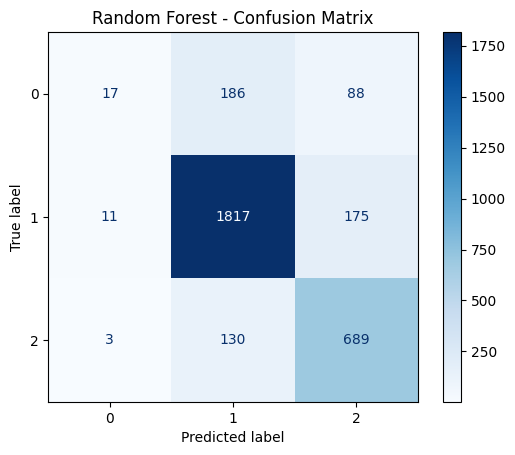

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.06      0.11       291
           1       0.85      0.91      0.88      2003
           2       0.72      0.84      0.78       822

    accuracy                           0.81      3116
   macro avg       0.71      0.60      0.59      3116
weighted avg       0.79      0.81      0.78      3116



In [ ]:
# Fit Random forrest approch to classify tweets

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Sample setup (replace with your actual data)
# X = feature matrix, y = labels
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

# 2. Predict on test set
rf_y_prediction = rf_model.predict(x_test)

# Compute accuracy and Misclassification rate
accuracy = accuracy_score(y_test, rf_y_prediction)
misclassification_rate = 1 - accuracy

print(f"Accuracy: {accuracy:.4f}")
print(f"Misclassification Rate: {misclassification_rate:.4f}")

# 3. Compute confusion matrix
cm = confusion_matrix(y_test, rf_y_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)

# 4. Plot confusion matrix
plt.figure(figsize=(6, 4))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Random Forest - Confusion Matrix")
plt.show()

# 5. Print classification report
print("Classification Report:")
print(classification_report(y_test, rf_y_prediction))


## K-Nearest Neighboar

Fitting 5 folds for each of 7 candidates, totalling 35 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KNN Accuracy: 0.7831
KNN Misclassification Rate: 0.2169


<Figure size 600x400 with 0 Axes>

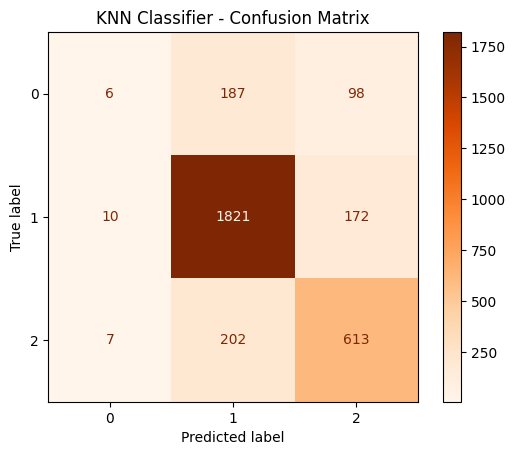

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.26      0.02      0.04       291
           1       0.82      0.91      0.86      2003
           2       0.69      0.75      0.72       822

    accuracy                           0.78      3116
   macro avg       0.59      0.56      0.54      3116
weighted avg       0.74      0.78      0.75      3116



In [ ]:
# KNN Classifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Parameter grid
grid_params = {
    'n_neighbors': [5, 10, 15, 20, 25, 30, 35],
    'metric': ['euclidean']
}

#1. Model setup
knn = KNeighborsClassifier()
knn_model = RandomizedSearchCV(knn, grid_params, random_state=14, n_jobs=-1, verbose=1)
knn_model.fit(x_train, y_train)

#2. Prediction
knn_y_prediction = knn_model.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_y_prediction)
misclassification_rate = 1 - knn_accuracy

print(f"KNN Accuracy: {knn_accuracy:.4f}")
print(f"KNN Misclassification Rate: {misclassification_rate:.4f}")


#3. Confusion matrix
cm_knn = confusion_matrix(y_test, knn_y_prediction)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn_model.classes_)

plt.figure(figsize=(6, 4))
disp_knn.plot(cmap=plt.cm.Oranges, values_format='d')
plt.title("KNN Classifier - Confusion Matrix")
plt.show()

#4. Classification report
print("Classification Report for KNN:")
print(classification_report(y_test, knn_y_prediction))


# **Recurrent Neural Network (RNN)**

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


312/312 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6262 - loss: 0.8688 - val_accuracy: 0.6546 - val_loss: 0.8032
Epoch 2/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6515 - loss: 0.8283 - val_accuracy: 0.6675 - val_loss: 0.8031
Epoch 3/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6509 - loss: 0.8253 - val_accuracy: 0.6963 - val_loss: 0.8046
Epoch 4/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6645 - loss: 0.8167 - val_accuracy: 0.6939 - val_loss: 0.7650
Epoch 5/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6738 - loss: 0.8072 - val_accuracy: 0.7236 - val_loss: 0.7814
Epoch 6/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6878 - loss: 0.7748 - val_accuracy: 0.7072 - val_loss: 0.7405
Epoch 7/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6745 - loss: 0.7891 - val_accuracy: 0.7501 - val_loss: 0.7118
Epoch 8/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7084 - loss: 0.7475 - val_accuracy: 0.7545 - val_

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


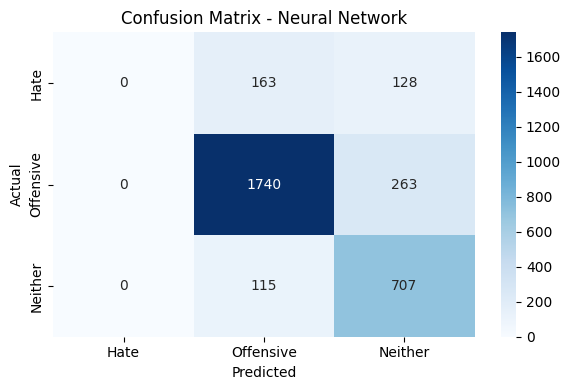

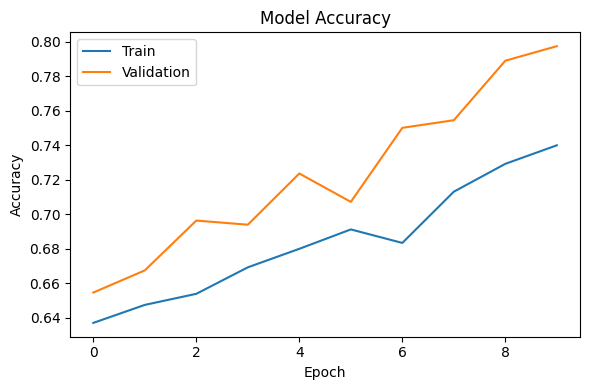

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#1. Define the neural network architecture
model = Sequential([
    Dense(128, input_shape=(x_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # 3 classes: hate speech, offensive, neither
])

#2. Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#3. Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

#4 Evaluate the model
y_pred_nn = model.predict(x_test)
y_pred_labels = y_pred_nn.argmax(axis=1)

# Accuracy
nn_accuracy = accuracy_score(y_test, y_pred_labels)
misclassification_rate = 1- nn_accuracy

print(f"Neural Network Accuracy: {nn_accuracy:.4f}")
print(f"NN Misclassification Rate: {misclassification_rate:.4f}")

#5. Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_labels))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Hate', 'Offensive', 'Neither'], yticklabels=['Hate', 'Offensive', 'Neither'])
plt.title("Confusion Matrix - Neural Network")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
## Change the hidden layers to 3
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

model = Sequential([
    Dense(64, input_shape=(x_train.shape[1],), activation='relu'),
    Dropout(0.4),

    Dense(32, activation='relu'),
    Dropout(0.3),

    Dense(16, activation='relu'),
    Dropout(0.2),

    Dense(3, activation='softmax')  # Output layer for 3 classes
])

#2. Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#3. Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=1)

#4 Evaluate the model
y_pred_nn = model.predict(x_test)
y_pred_labels = y_pred_nn.argmax(axis=1)

# Accuracy
nn_accuracy = accuracy_score(y_test, y_pred_labels)
misclassification_rate = 1- nn_accuracy

print(f"Neural Network Accuracy: {nn_accuracy:.4f}")
print(f"NN Misclassification Rate: {misclassification_rate:.4f}")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4443 - loss: 1.0860 - val_accuracy: 0.6510 - val_loss: 0.8442
Epoch 2/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6259 - loss: 0.8966 - val_accuracy: 0.6510 - val_loss: 0.8310
Epoch 3/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6235 - loss: 0.8739 - val_accuracy: 0.6510 - val_loss: 0.8269
Epoch 4/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6357 - loss: 0.8621 - val_accuracy: 0.6510 - val_loss: 0.8191
Epoch 5/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6436 - loss: 0.8547 - val_accuracy: 0.6510 - val_loss: 0.8149
Epoch 6/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6363 - loss: 0.8544 - val_accuracy: 0.6510 - val_loss: 0.8033
Epoch 7/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6329 - loss: 0.8630 - val_accuracy: 0.6510 - val_loss: 0.8353
Epoch 8/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6427 - loss: 0.8337 - val_accuracy: 0.6510 - val_loss: 0.7913
Epo

Random forest Accuracy - Accuracy: 0.8097

KNN accuracy - 0.7831

Neural Network Accuracy: 0.7853